In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy import optimize

In [2]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [3]:
x = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]   # x就是t
y = [2116.13394981,1661.62732319,1510.94943673,1564.33941089,1549.46055443,1668.64267272,
      1471.69451766,1384.44255949,1237.62536576,1182.76866341,854.64818975,755.06722035,
      768.21039657,729.27447933,764.29501428]   # y就是位移s         

In [4]:
# 这一段是用最小二乘法画出拟合曲线
def fit_function(x,A,R,B):  #
    return A*R**((x-B)/4.7)
A1,R1,B1 = optimize.curve_fit(fit_function,x,y)[0]  # 最小二乘法拟合
x1 = x
print(x1)
print(x)


y1 = np.zeros_like(x1)
for i in range(0,15):
    y1[i] =  A1*R1**((x[i]-B1)/4.7)  # x1,y1是拟合值，x,y是观察值

print(y1)
print(y)
print(A1,R1,B1)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1989 1856 1733 1617 1510 1409 1315 1228 1146 1070  999  932  870  812
  758]
[2116.13394981, 1661.62732319, 1510.94943673, 1564.33941089, 1549.46055443, 1668.64267272, 1471.69451766, 1384.44255949, 1237.62536576, 1182.76866341, 854.64818975, 755.06722035, 768.21039657, 729.27447933, 764.29501428]
2346.3909366616404 0.7234935156601152 1.6026089502413303


In [5]:
# 利用公式计算卡方
Npoints = 15  # 5个样本
sum1 = np.zeros_like(x)
chi2 = np.zeros_like(x)
sum2 = float
sigmay = float
ey = float

for i in range(0,15):
    sum1[i] = (y1[i]-y[i])**2  # sum1是各项(观察值-拟合值)平方的数组

sum2 = np.sum(sum1)  # sum2是sum1各项的和
sigmay = np.sqrt(sum2/(Npoints - 1))/np.sqrt(Npoints)  # sigmay是y的样本标准差  原来是sigmay = np.sqrt(sum2/(Npoints - 1))
variancey = sigmay**2  # variancey是y的方差
print(variancey)
ey = sigmay
print(ey)
for j in range(0,15):
    chi2[j] += sum1[j]/variancey  # 求各项chi2

Chi2_fit = np.sum(chi2)  # 求和求chi2
print(Chi2_fit)

1497.6952380952382
38.7000676755899
202


In [6]:
# 求出可能性
Nvar = 3
Ndof_fit = Npoints - Nvar
Prob_fit = stats.chi2.sf(Chi2_fit,Ndof_fit)
print(Prob_fit)

1.260382978608457e-36


C:\Users\dell\AppData\Local\Temp/ipykernel_6936/2066011341.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',markersize=3,color="black")


NameError: name 'ax' is not defined

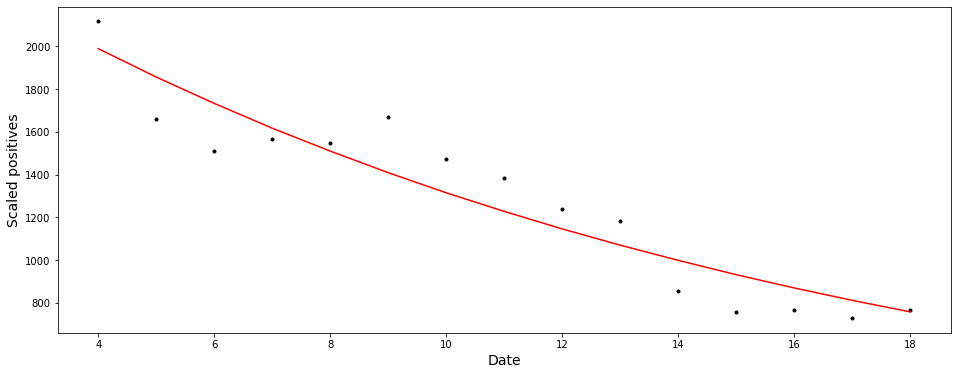

In [7]:

# 画图
fig = plt.subplots(figsize=(16, 6))

plt.plot(x,y,'ro',markersize=3,color="black")
plt.xlabel('Date',fontsize=14)
plt.ylabel('Scaled positives',fontsize=14)

plt.plot(x1,y1,'r')

d = {'a': "2346.3909",
     'R': "0.7235",
     'b': "1.6026",
 #    'sigma':       [minuit_chi2.values['sigma'], minuit_chi2.errors['sigma']],
#     'Chi2':     chi2_value,
#    'ndf':      Ndof_value,
#     'Prob':     Prob_value,
    }
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.65, 0.95, text, ax, fontsize=20)


plt.savefig('fig1',dpi=600)
